In [2]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt

In [3]:
emf = pd.read_json('obj/topGOPCampaignEmailOutput.json')
emf.head()

,Body,Date,From,Subject
0,"++HYPERLINK++ recipientFirstName, If there's ...",2019-05-25 15:05:25,"""Eric Trump"" <contact@victory.donaldtrump.com>",=?UTF-8?B?Tiwgd2XigJl2ZSBnb3QgeW91ciBtZW1iZXJz...
1,++HYPERLINK++ JOIN PRESIDENT TRUMP IN PANAMA ...,2019-05-06 14:04:15,"""Team Trump-Pence"" <contact@team.donaldtrump.com>",Join the president in TWO days
2,"++HYPERLINK++ recipientFirstName, The ONE MIL...",2019-06-03 18:31:41,"""Lara Trump"" <contact@victory.donaldtrump.com>",=?UTF-8?B?SXTigJlzIHJlYWR5IHRvIGdv?=
3,Take a stand against the left-wing mob. | rec...,2019-03-20 21:00:02,"""DonaldJTrump.com"" <contact@victory.donaldtrum...",Stand with President Trump
4,"++HYPERLINK++ recipientFirstName, The Preside...",2019-01-31 20:06:35,"""Lara Trump"" <contact@victory.donaldtrump.com>",Start 2019 strong


Let's see what the first and last date of the emails are

In [4]:
maxmin = emf['Date'].agg(['max','min'])
print(maxmin[:2])
d2, d1 = maxmin[0],maxmin[1]
ddiff = d2 - d1
print('Total span of {} days'.format(ddiff.days))
print('Total number of emails: {}, average of {} per day'.format(emf['Date'].count(), int(emf['Date'].count()) / int(ddiff.days)))

max   2020-01-06 22:04:59
min   2017-11-03 18:00:01
Name: Date, dtype: datetime64[ns]
Total span of 794 days
Total number of emails: 502, average of 0.6322418136020151 per day


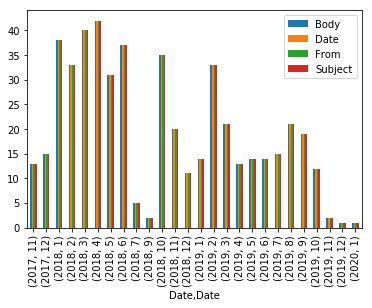

In [5]:
emf.groupby([emf["Date"].dt.year, emf["Date"].dt.month]).agg('count').plot(kind="bar")

There were no emails sent in August, 2018... I went back to my email, and sure enough. I wonder why. Might be worth looking at the news cycle for that month.

Let's start with the NLTK. 

In [6]:
allBody = emf['Body'].str.cat(sep=' ')
allBody

 All you have to do is contribute $5 or more and you\'ll be automatically entered to win dinner with me in New Orleans. My team will even cover your flight and hotel room. ++HYPERLINK++ Please contribute $5 before May 9th at 11:59 PM to be automatically entered to have dinner with me in New Orleans. ++HYPERLINK++ ++HYPERLINK++ NEW ORLEANS DINNER SWEEPSTAKES ENTRY SUPPORTER: ++HYPERLINK++ recipientEmail ENTRY: PENDING DEADLINE: MAY 9th at 11:59 PM ++HYPERLINK++ CONTRIBUTE $5 ++HYPERLINK++ CONTRIBUTE $20 ++HYPERLINK++ CONTRIBUTE $15 ++HYPERLINK++ CONTRIBUTE $10 ++HYPERLINK++ CONTRIBUTE $5 ++HYPERLINK++ CONTRIBUTE OTHER AMOUNT Don\'t let this once-in-a-lifetime opportunity pass you by. You\'ll receive dinner and a photo with me, and we will cover the cost of your flight and hotel room. All you have to do is show up. I hope to see you there! ++HYPERLINK++ Contribute $5 before May 9th at 11:59 PM to be automatically entered to win dinner with me in New Orleans. Thank you, ++HYPERLINK++ Dona

In [7]:
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize, wordpunct_tokenize
from nltk import FreqDist

In [8]:
words = word_tokenize(allBody)
sentences = sent_tokenize(allBody)
print('number of tokens (words and punctiation): {}; number of sentences: {}; number of unique tokens: {}'.format(len(words),len(sentences),len(set(words))))
print('lexical diversity: {}%'.format(100*(len(set(allBody)) / len(allBody))))

number of tokens (words and punctiation): 130424; number of sentences: 5330; number of unique tokens: 5076
lexical diversity: 0.012508942488380036%


In [25]:
stop_words = set(stopwords.words('english'))
ft = [w for w in words if not w in stop_words]
ft = [w for w in ft if w.isalpha()]
trump_stop_words = ['++HYPERLINK++','CONTRIBUTE','Trump','I','President','PM','11:59','TONIGHT','Donald','THE','J.','OTHER','YOU','American','AMOUNT','Official']
ft = [w for w in ft if not w in trump_stop_words]
commWords = FreqDist(ft).most_common(50)

In [26]:
commWords

[('recipientFirstName', 618),
 ('Please', 592),
 ('America', 439),
 ('We', 421),
 ('make', 416),
 ('contribution', 413),
 ('The', 395),
 ('Thank', 383),
 ('Democrats', 350),
 ('recipientEmail', 332),
 ('United', 328),
 ('States', 327),
 ('want', 298),
 ('list', 292),
 ('win', 281),
 ('name', 273),
 ('need', 259),
 ('Sustaining', 243),
 ('Membership', 242),
 ('get', 240),
 ('media', 236),
 ('take', 234),
 ('us', 232),
 ('one', 230),
 ('country', 227),
 ('YOUR', 212),
 ('contribute', 206),
 ('help', 200),
 ('But', 190),
 ('know', 189),
 ('people', 186),
 ('movement', 182),
 ('You', 178),
 ('entered', 175),
 ('Headquarters', 175),
 ('supporters', 167),
 ('DEADLINE', 167),
 ('time', 161),
 ('year', 158),
 ('Friend', 157),
 ('see', 156),
 ('Great', 154),
 ('show', 154),
 ('NOW', 153),
 ('ANY', 149),
 ('automatically', 148),
 ('like', 148),
 ('let', 147),
 ('sure', 145),
 ('EMAIL', 144)]